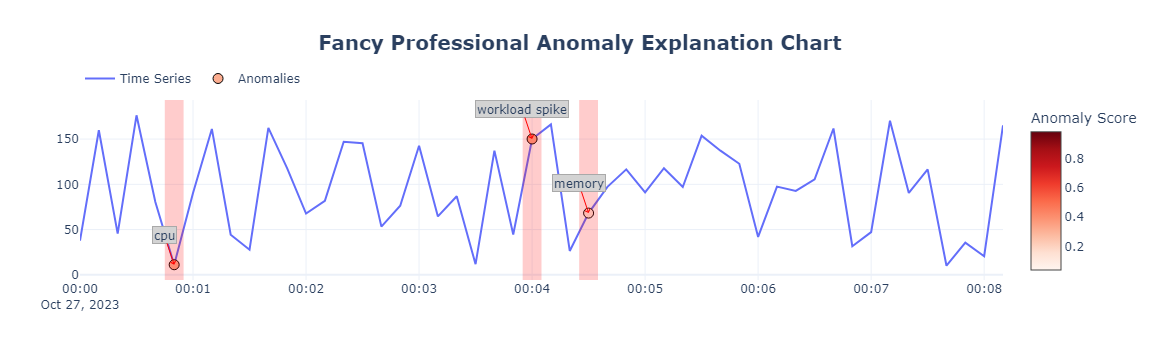

In [35]:
import pandas as pd
import random
import plotly.express as px
import plotly.graph_objects as go

# 더미 데이터 생성
n = 50  # 데이터 포인트 수

# 날짜 범위 생성
date_rng = pd.date_range(start="2023-10-27 00:00:00", periods=n, freq="10s")

# 더미 데이터 생성
data = {
    "Timestamp": date_rng,
    "Value": [random.uniform(0, 180) for _ in range(n)],
    "Anomaly_Score": [random.uniform(0, 1) for _ in range(n)],
    "is_anomaly": [random.choice([False, False,False, False,False, False, True, False,False,False, False, False]) for _ in range(n)],
    "Anomaly_Cause": [random.choice(["workload spike", "cpu", "memory"]) for _ in range(n)]
}

# 데이터프레임 생성
df = pd.DataFrame(data)

# 그래프 생성
fig = go.Figure()

# 시계열 데이터를 라인 그래프로 추가
fig.add_trace(go.Line(x=df["Timestamp"], y=df["Value"], mode="lines", name="Time Series"))


df_anomaly = df[df['is_anomaly']==True]
# Anomaly Score에 따라 색상 동적 설정
color_scale = "Reds"  # 원하는 색상 스케일 선택
colors = df["Anomaly_Score"]  # Anomaly Score에 따라 색상 설정
colorbar_title = "Anomaly Score"

# 스캐터 플롯로 추가
fig.add_trace(go.Scatter(x=df_anomaly["Timestamp"], y=df_anomaly["Value"], mode="markers", name="Anomalies", 
                         marker=dict(size=10, color=colors, colorscale=color_scale, colorbar_title=colorbar_title,line=dict(width=1, color="black"))))


# 범례를 차트 위에 추가
fig.update_layout(legend=dict(orientation="h", y=1.2, x=0)) 
fig.update_layout(
    title='<b>Fancy Professional Anomaly Explanation Chart</b>',
    title_font=dict(size=20),
    title_x=0.5,  # 제목의 가로 위치 (0-1),
    template = 'plotly_white'

)

# is_anomaly가 True인 포인트에 빨간색 배경 표시
anomaly_indices = df[df["is_anomaly"] == True].index
for index in anomaly_indices:
    fig.add_vrect(
            x0=df["Timestamp"][index]-pd.Timedelta("5s"),
            x1=df["Timestamp"][index]+pd.Timedelta("5s"),
          #  y0=0,
           # y1=1000,  # 배경 높이 설정
            fillcolor="red",
            opacity=0.2,  # 투명도 설정
            line_width=0,

        #    layer="below",
        
    )

# 각 데이터 포인트에 화살표, 박스 및 텍스트 추가
for index, row in df.iterrows():
    if row['is_anomaly']:
        annotation = go.layout.Annotation(
            x=row["Timestamp"],
            y=row["Value"],
            text=row["Anomaly_Cause"],
            showarrow=True,
            arrowhead=4,  # 화살표 모양 설정 (1: 화살표 끝, 4: 화살표 양 끝)
            arrowcolor="Red",  # 화살표 색상 설정
            arrowwidth=1,  # 화살표 두께 설정
            bgcolor='lightgray',
            bordercolor="darkgray",  # 박스 테두리 색상 설정
            borderwidth=1,  # 박스 테두리 두께 설정
        )
        fig.add_annotation(annotation)

# 그래프 출력
fig.show()


